In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [114]:
df = pd.read_csv('forestfires.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None


In [115]:
print(df.isnull().sum())

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [116]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [117]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [118]:
df.drop_duplicates()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


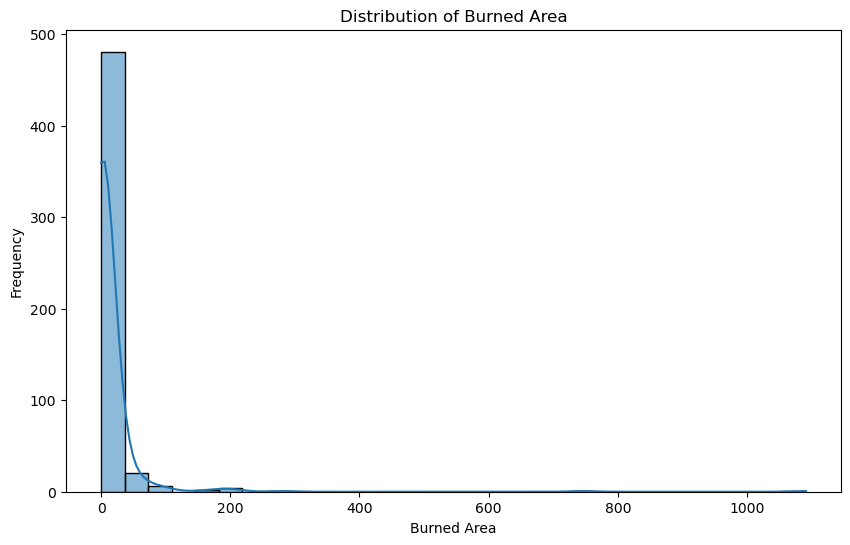

In [119]:
plt.figure(figsize=(10, 6))
sns.histplot(df['area'], bins=30, kde=True)
plt.title('Distribution of Burned Area')
plt.xlabel('Burned Area')
plt.ylabel('Frequency')
plt.show()

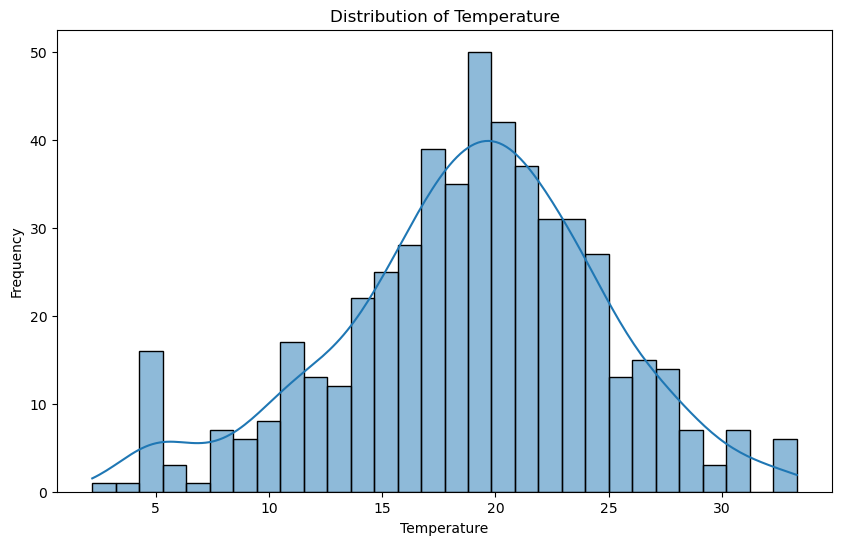

In [120]:
plt.figure(figsize=(10, 6))
sns.histplot(df['temp'], bins=30, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


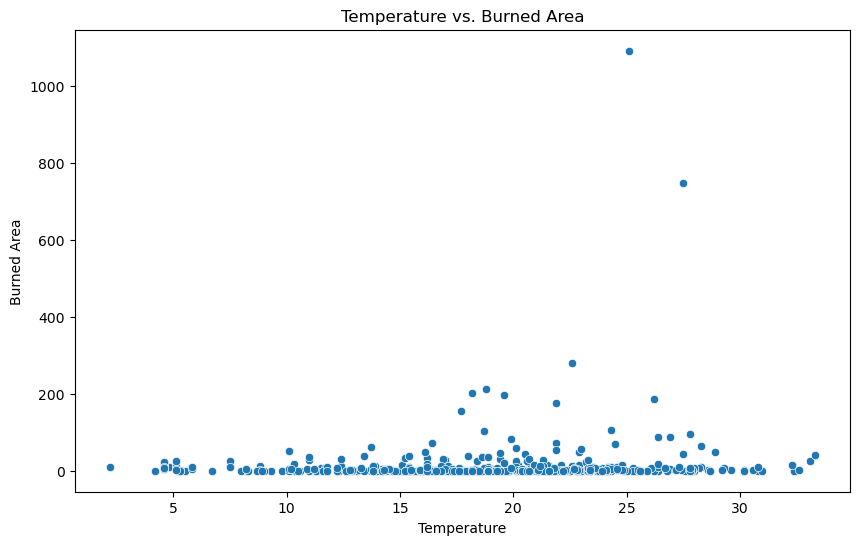

In [121]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='area', data=df)
plt.title('Temperature vs. Burned Area')
plt.xlabel('Temperature')
plt.ylabel('Burned Area')
plt.show()

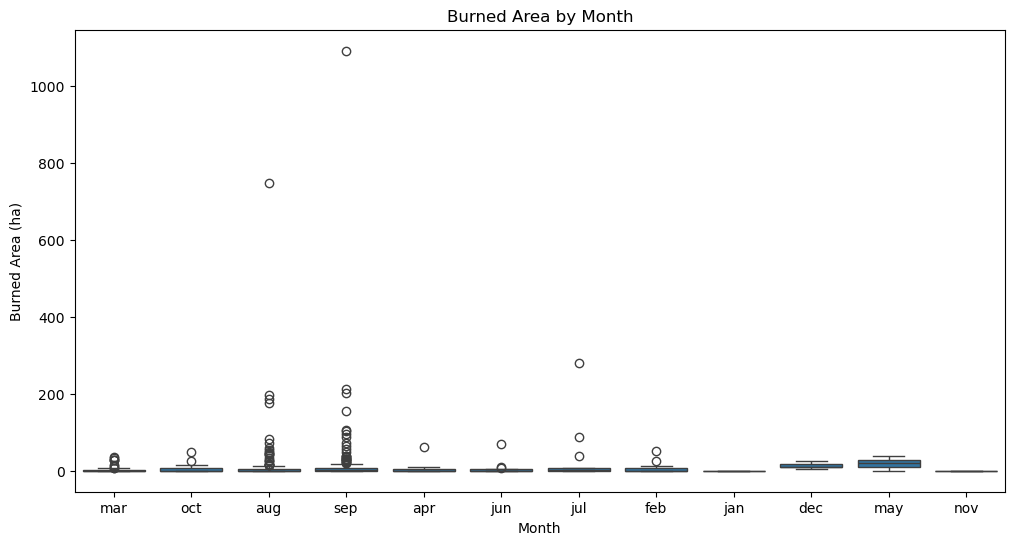

In [122]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='area', data=df)
plt.title('Burned Area by Month')
plt.xlabel('Month')
plt.ylabel('Burned Area (ha)')
plt.show()

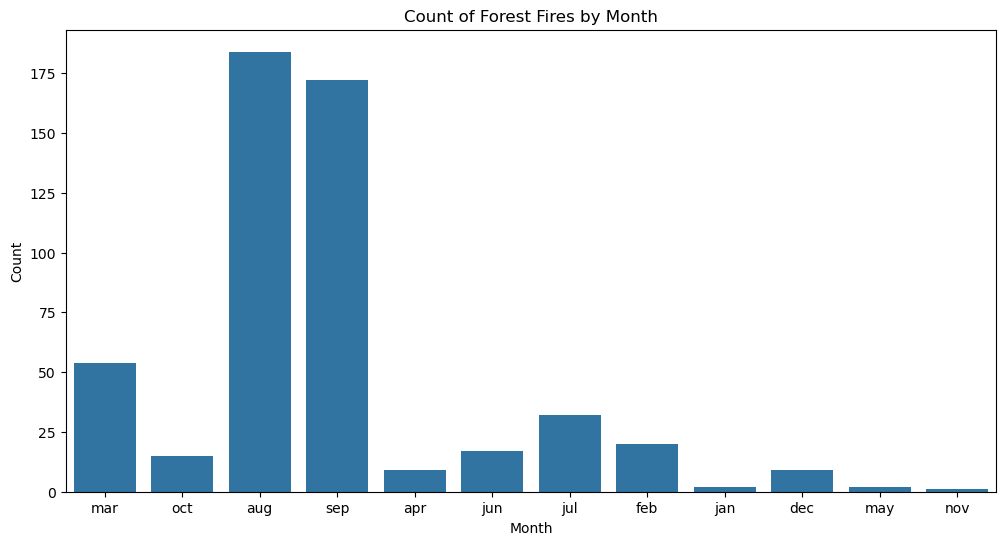

In [123]:
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=df)
plt.title('Count of Forest Fires by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [124]:
def categorize_damage(area):
    if area == 0:
        return 'No Damage'
    elif area <= 1:
        return 'Low Damage'
    elif area <= 10:
        return 'Moderate Damage'
    else:
        return 'High Damage'

C:\Users\doonp\AppData\Local\Temp\ipykernel_19800\2445451230.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_category', y=feature, data=df, palette='viridis')
C:\Users\doonp\AppData\Local\Temp\ipykernel_19800\2445451230.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_category', y=feature, data=df, palette='viridis')
C:\Users\doonp\AppData\Local\Temp\ipykernel_19800\2445451230.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_category', y=feature, data=df, palette='viridis')


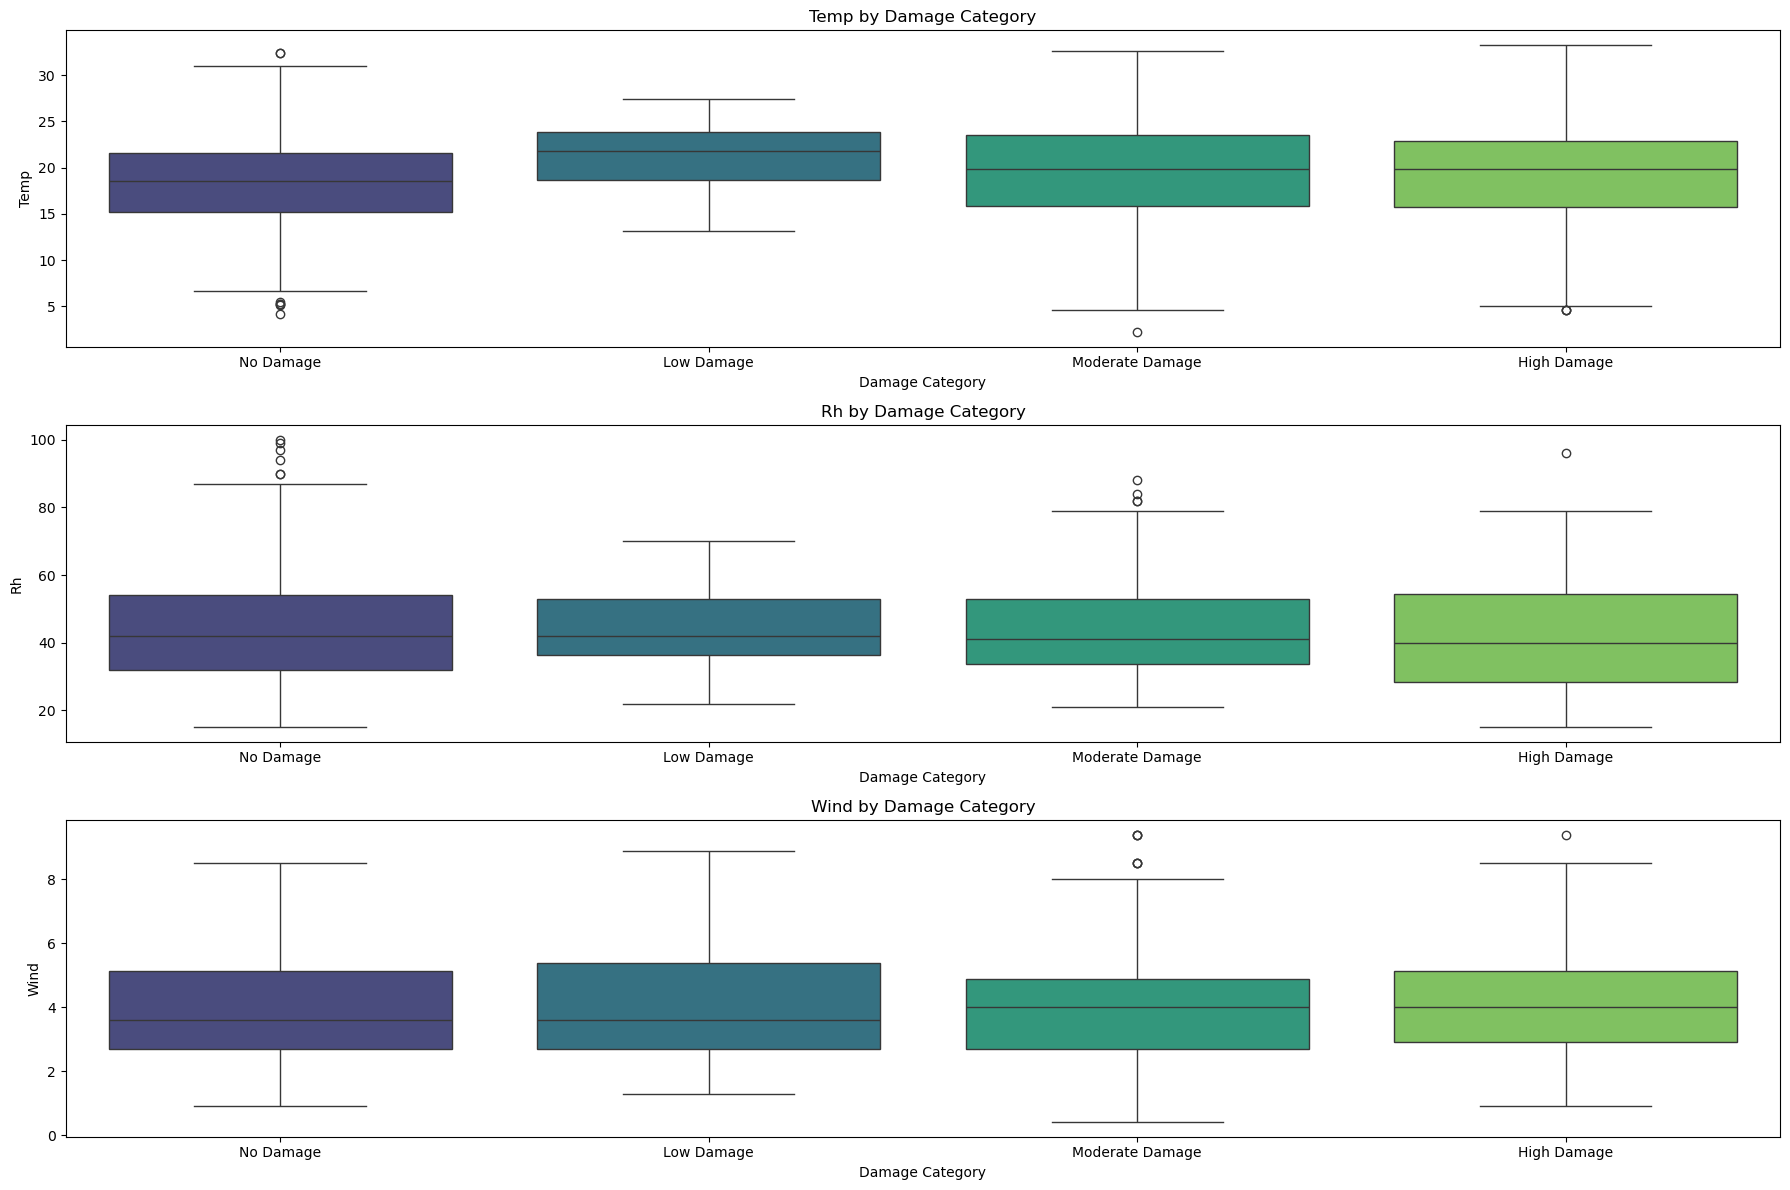

In [125]:
# Apply the function to create a new column 'damage_category'
df['damage_category'] = df['area'].apply(categorize_damage)

# List of features to analyze
features = ['temp', 'RH', 'wind']

# Plotting the distribution of features across damage categories
plt.figure(figsize=(18, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x='damage_category', y=feature, data=df, palette='viridis')
    plt.title(f'{feature.capitalize()} by Damage Category')
    plt.xlabel('Damage Category')
    plt.ylabel(feature.capitalize())

plt.tight_layout()
plt.show()

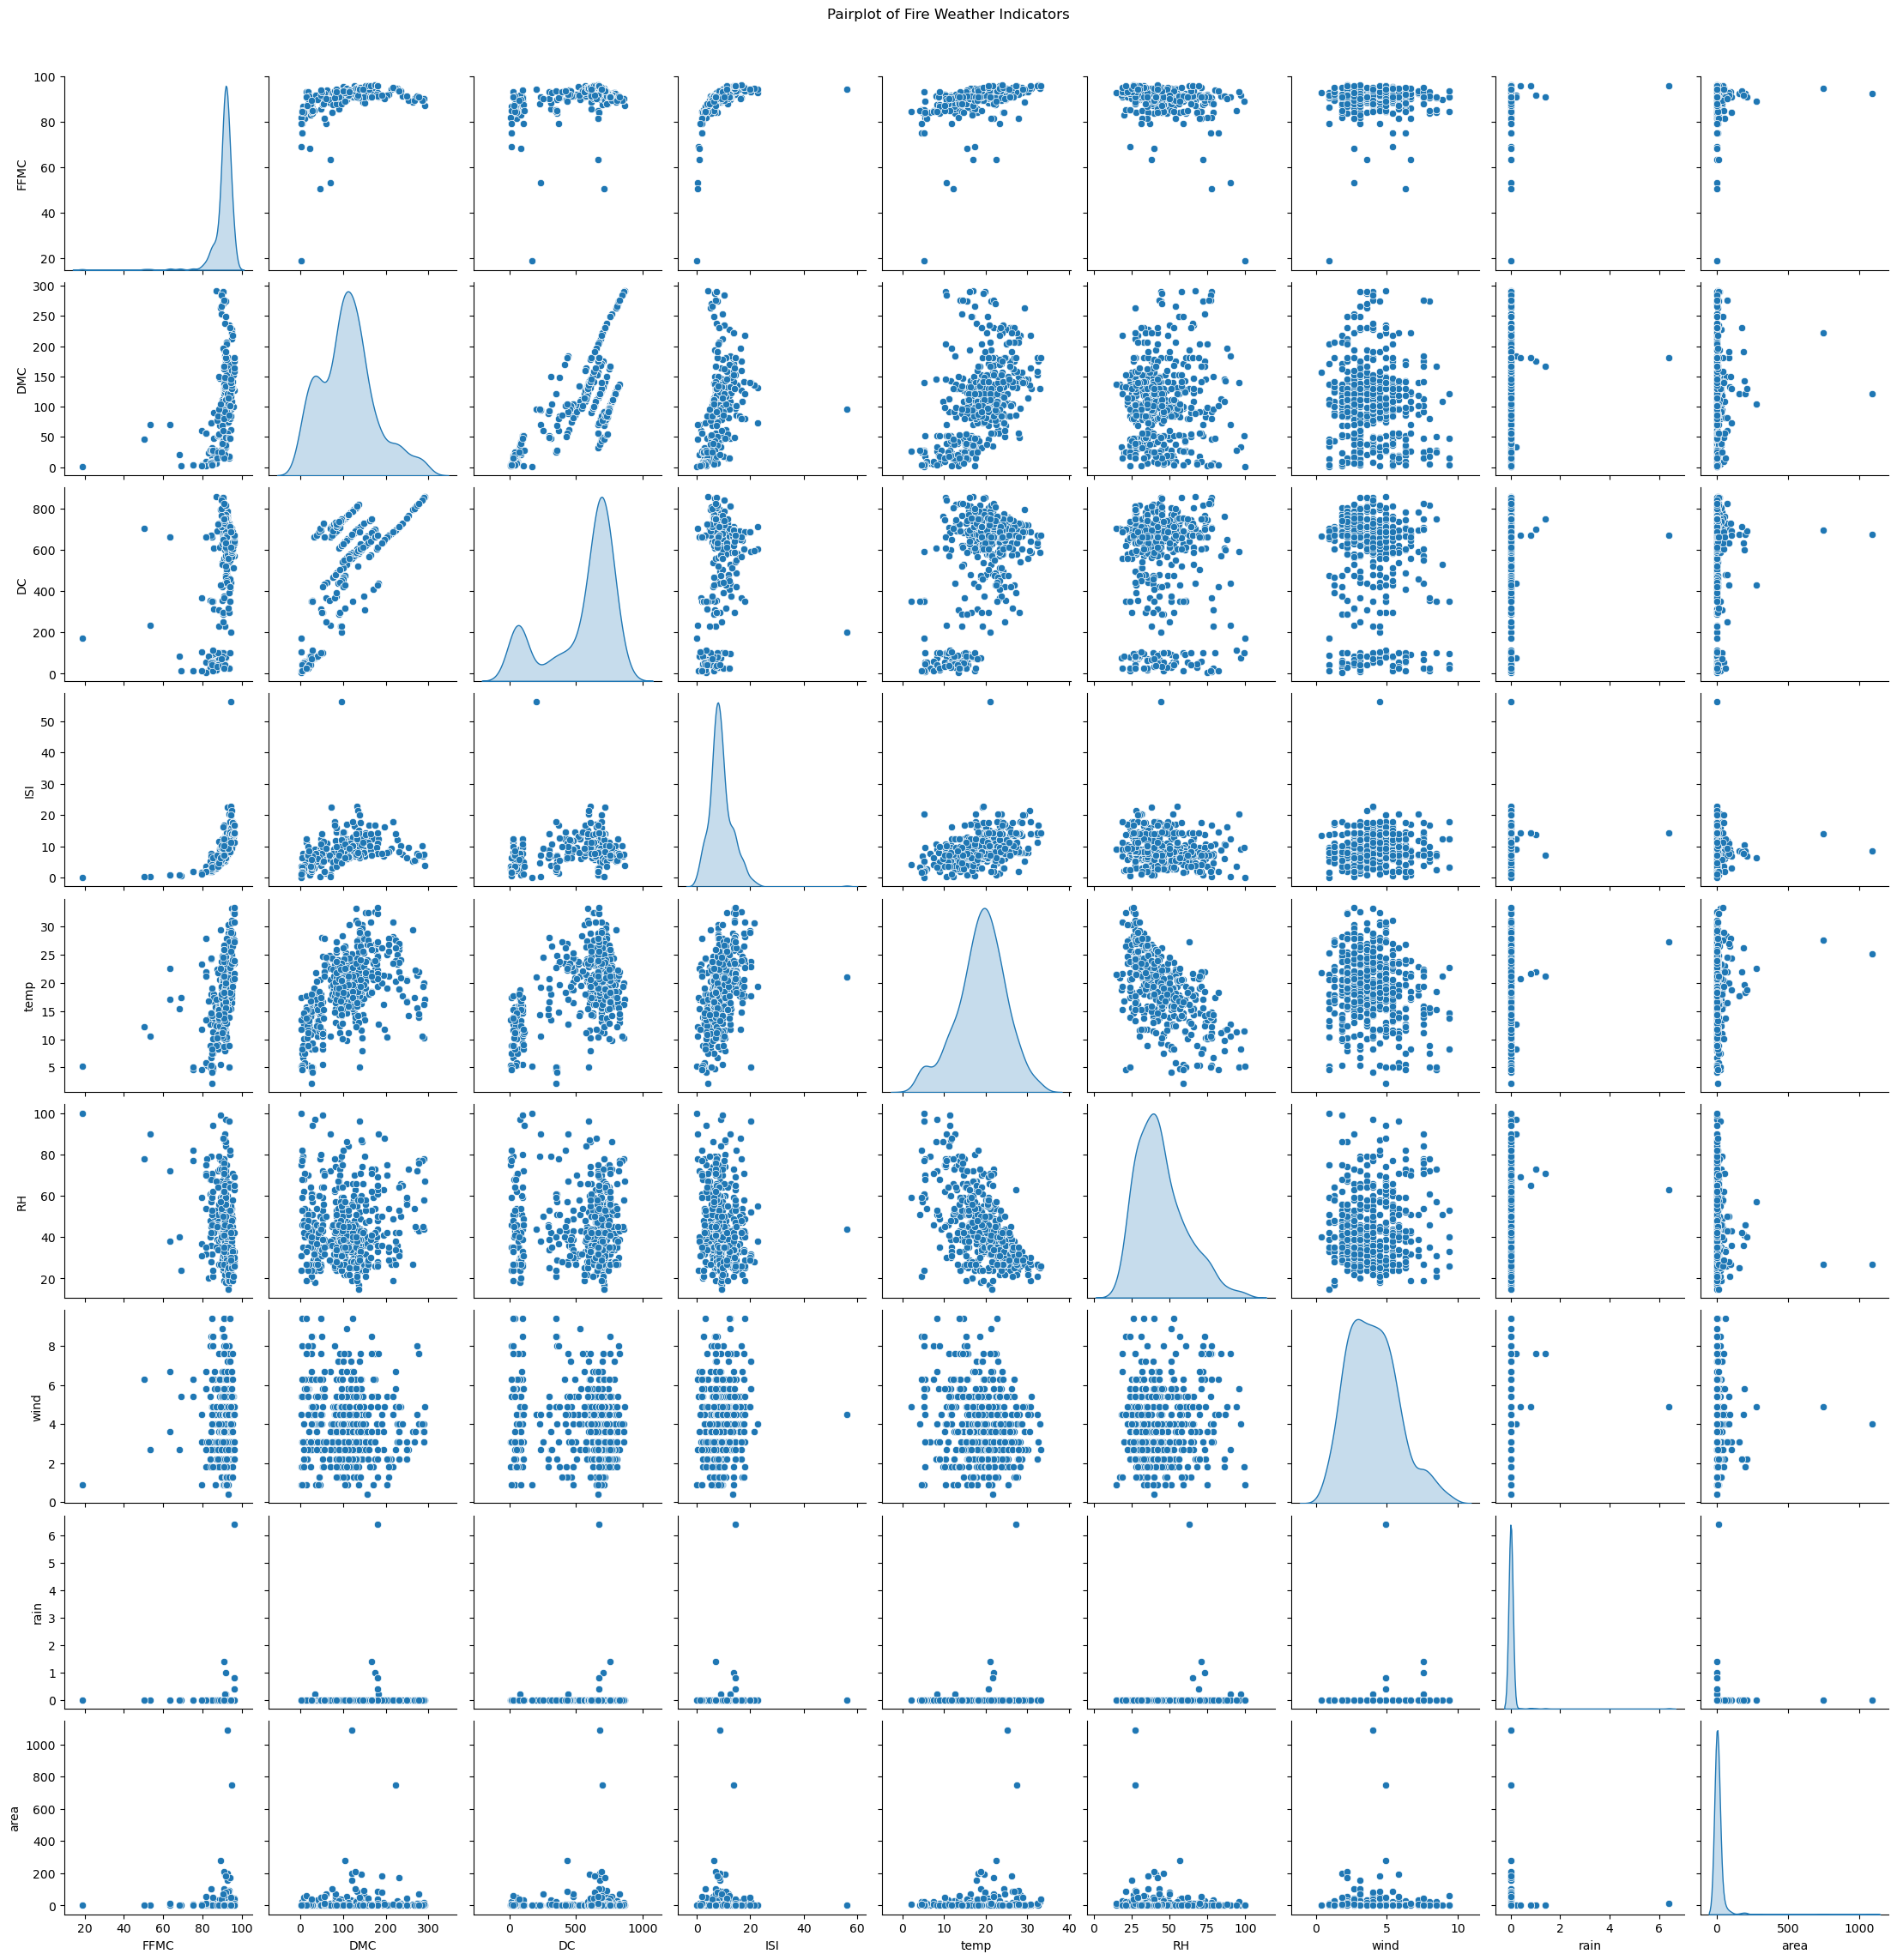

In [126]:
sns.pairplot(df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']], diag_kind='kde')
plt.suptitle('Pairplot of Fire Weather Indicators', y=1.02)
plt.show()

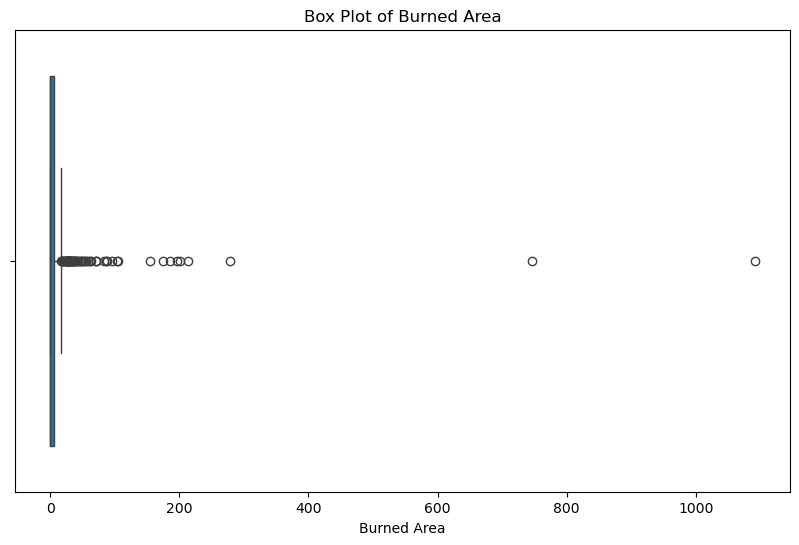

In [127]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='area', data=df)
plt.title('Box Plot of Burned Area')
plt.xlabel('Burned Area')
plt.show()

In [128]:
df['month'] = df['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
df['day'] = df['day'].map({'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7})

# Create a new feature 'is_weekend'
df['is_weekend'] = df['day'].apply(lambda x: 1 if x in [6, 7] else 0)

In [129]:
from sklearn.model_selection import train_test_split
X = df.drop(['area','damage_category'],axis=1)
y = df['area']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=200)

In [130]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [131]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [132]:
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 1874.4742310655658
R2 Score: -1.3020131399004637


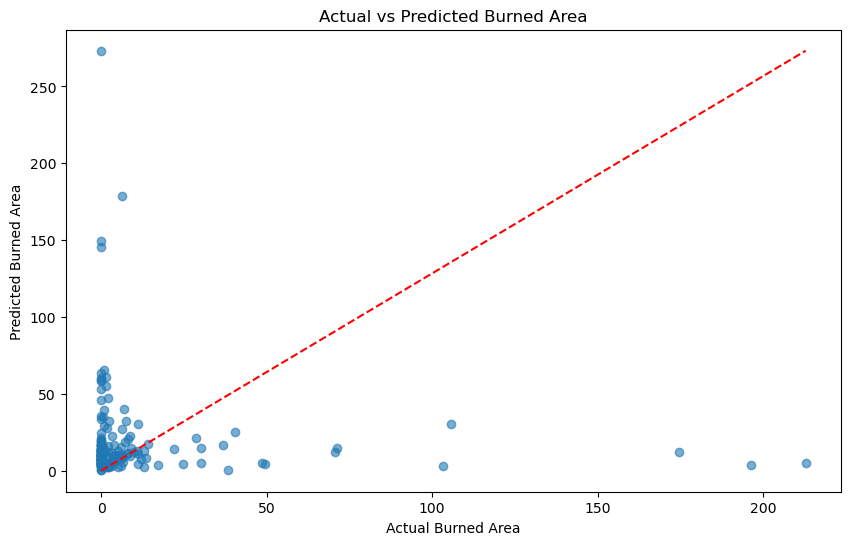

In [133]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Burned Area')
plt.ylabel('Predicted Burned Area')
plt.title('Actual vs Predicted Burned Area')
plt.plot([0, max(y_test)], [0, max(y_pred)], color='red', linestyle='--')
plt.show()

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np


In [135]:
# Select fewer features
X = df[['temp', 'RH', 'wind', 'rain']].values
y = np.log1p(df['area'])  # Apply log1p transformation to the target variable

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler for later use
import joblib
joblib.dump(scaler, 'scaler_fewer_features.pkl')

['scaler_fewer_features.pkl']

In [136]:
# Define a simple neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)



Epoch 1/50


C:\Users\doonp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 3.0073 - mae: 1.1613 - val_loss: 1.6475 - val_mae: 0.9125
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.6259 - mae: 1.1526 - val_loss: 1.4189 - val_mae: 0.9165
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.1656 - mae: 1.1529 - val_loss: 1.3798 - val_mae: 0.9446
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.1192 - mae: 1.1630 - val_loss: 1.3818 - val_mae: 0.9448
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9228 - mae: 1.1076 - val_loss: 1.3936 - val_mae: 0.9567
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9998 - mae: 1.1671 - val_loss: 1.3969 - val_mae: 0.9683
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.0478 - mae: 1.1848 - val_loss: 1.3890 - val_mae: 0.9600
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.7702 - mae: 1.0913 - val_loss: 1.4085 - val_mae: 0.9704
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.0130 - mae: 1.

In [137]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))
r2 = r2_score(np.expm1(y_test), np.expm1(y_pred))

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000299CE4823E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Mean Squared Error: 12082.023797670276
R2 Score: -0.02496331992000589


In [138]:
# Save the trained model
model.save('forest_fire_nn_fewer_features.h5')